# **Challenger de Análisis de Datos sobre las ventas realizado de Cuatro Tiendas**

## 1. Importación de datos



In [2]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.sample(10)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
1973,Refrigerador,Electrodomésticos,2232900.0,117100.0,12/08/2022,Rafael Acosta,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
785,Sofá reclinable,Muebles,727900.0,39200.0,12/07/2022,Camila Rivera,Cali,4,Nequi,1,3.43722,-76.52250
1613,Cuerda para saltar,Deportes y diversión,9400.0,0.0,19/01/2022,Izabela de León,Pereira,5,Nequi,1,4.81333,-75.69611
551,Batería,Instrumentos musicales,927500.0,47600.0,31/05/2020,Maria Alfonso,Cali,5,Nequi,1,3.43722,-76.52250
2196,Armario,Muebles,480000.0,23700.0,22/03/2021,Maria Alfonso,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
1756,Smartwatch,Electrónicos,203300.0,11500.0,18/03/2021,Lucas Olivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
90,Muñeca bebé,Juguetes,42000.0,0.0,22/01/2021,Izabela de León,Cali,2,Tarjeta de crédito,7,3.43722,-76.52250
1524,Sofá reclinable,Muebles,605100.0,32600.0,30/04/2020,Rafael Acosta,Medellín,5,Nequi,1,6.25184,-75.56359
892,Carrito de control remoto,Juguetes,88000.0,2900.0,25/02/2023,Beatriz Morales,Bogotá,5,Tarjeta de crédito,2,4.60971,-74.08175
2344,Cama king,Muebles,782000.0,39800.0,23/03/2020,Mariana Herrera,Medellín,5,Nequi,1,6.25184,-75.56359


## 2. Análisis de factibilidad

### a) Análisis de facturación



In [3]:
# importacion del modulo pyplot
from matplotlib import pyplot as plt

# Suma valores registrados en  columna "precio" por  tienda
ventas_tienda1 = round((tienda1['Precio'].sum()))
ventas_tienda2 = round((tienda2['Precio'].sum()))
ventas_tienda3 = round((tienda3['Precio'].sum()))
ventas_tienda4 = round((tienda4['Precio'].sum()))

print(f'Ingresos Totales Tienda 1: {ventas_tienda1:,}')
print(f'Ingresos Totales Tienda 2: {ventas_tienda2:,}')
print(f'Ingresos Totales Tienda 3: {ventas_tienda3:,}')
print(f'Ingresos Totales Tienda 1: {ventas_tienda4:,}')




Ingresos Totales Tienda 1: 1,150,880,400
Ingresos Totales Tienda 2: 1,116,343,500
Ingresos Totales Tienda 3: 1,098,019,600
Ingresos Totales Tienda 1: 1,038,375,700


(np.float64(-1.1403441179236413),
 np.float64(1.1421800136257534),
 np.float64(-1.1418945788773536),
 np.float64(1.1406487842873538))

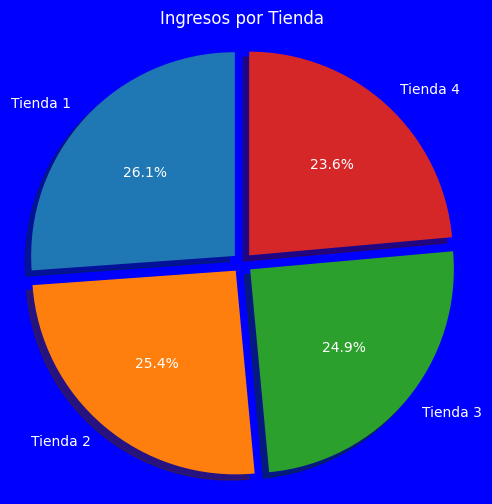

In [4]:
# Graficacion de resultados
labels = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ventas = [ventas_tienda1, ventas_tienda2, ventas_tienda3, ventas_tienda4]
explode = (0.05, 0.05, 0.05, 0.05)

# Crear figura
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('blue')  # Fondo azul

# Gráfica Pie
ax.pie(
    ventas,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'color': 'white'}  # Labels en blanco
)

ax.set_title('Ingresos por Tienda', color='white')
ax.axis('equal')

### b) Ventas por categoría




Tienda 1, La suma de los precios agrupados por categoria es: {'Artículos para el hogar': 12698400, 'Deportes y diversión': 39290000, 'Electrodomésticos': 363685200, 'Electrónicos': 429493500, 'Instrumentos musicales': 91299000, 'Juguetes': 17995700, 'Libros': 8784900, 'Muebles': 187633700}


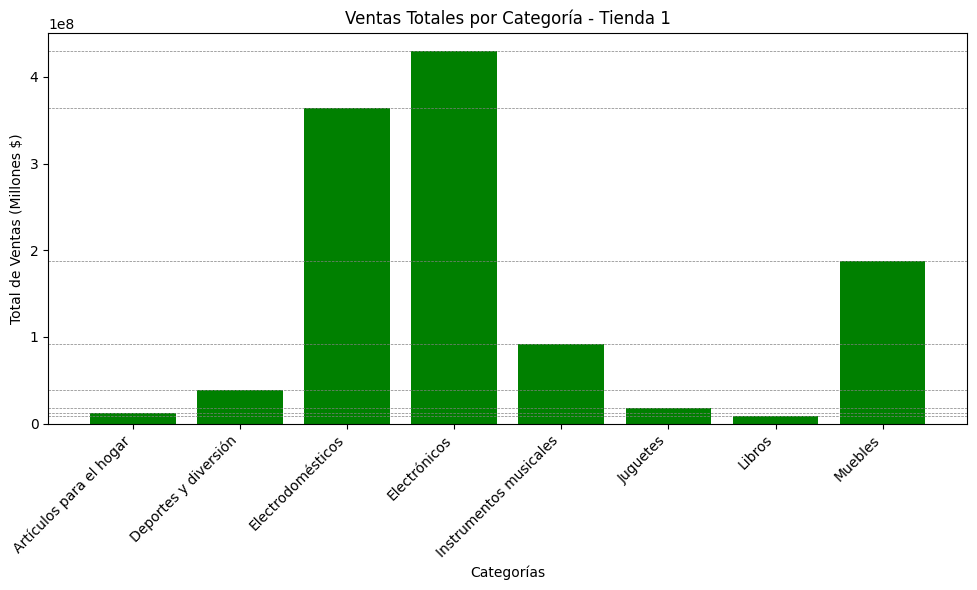

In [5]:
# Tienda 1

# Agrupación por categoría y suma de precios
categoria_valor1 = (
    tienda1
    .groupby('Categoría del Producto')['Precio']
    .sum()
    .astype(int)
    .to_dict()
)

print(f'Tienda 1, La suma de los precios agrupados por categoria es: {categoria_valor1}')

# Gráfico TIENDA 1

# Preparación de datos
categorias = list(categoria_valor1.keys())
valores = list(categoria_valor1.values())

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(categorias, valores, color='green')

for valor in valores:
    plt.axhline(y=valor, color='gray', linestyle='--', linewidth=0.5)

# Personalizar el gráfico
plt.title("Ventas Totales por Categoría - Tienda 1")
plt.xlabel("Categorías")
plt.ylabel("Total de Ventas (Millones $)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()



Tienda 2, La suma de los precios agrupados por categoria es: {'Artículos para el hogar': 14746900, 'Deportes y diversión': 34744500, 'Electrodomésticos': 348567800, 'Electrónicos': 410831100, 'Instrumentos musicales': 104990300, 'Juguetes': 15945400, 'Libros': 10091200, 'Muebles': 176426300}


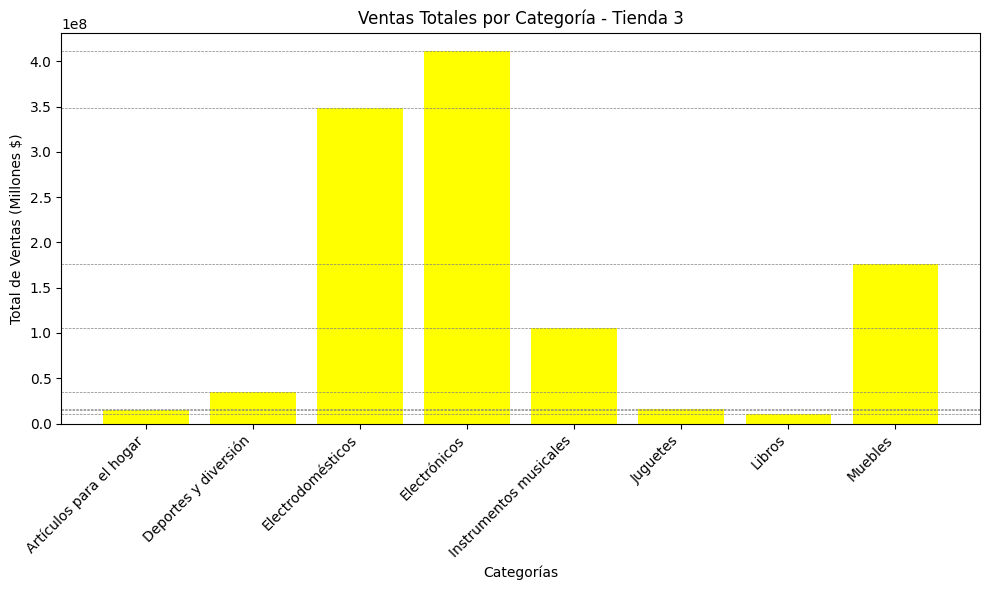

In [6]:
# Tienda 2

# Agrupación por categoría y suma de precios
categoria_valor2 = (
    tienda2
    .groupby('Categoría del Producto')['Precio']
    .sum()
    .astype(int)
    .to_dict()
)

print(f'Tienda 2, La suma de los precios agrupados por categoria es: {categoria_valor2}')

# Gráfico TIENDA 2

# Preparación de datos
categorias = list(categoria_valor2.keys())
valores = list(categoria_valor2.values())

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(categorias, valores, color='yellow')

for valor in valores:
    plt.axhline(y=valor, color='gray', linestyle='--', linewidth=0.5)

# Personalizar el gráfico
plt.title("Ventas Totales por Categoría - Tienda 3")
plt.xlabel("Categorías")
plt.ylabel("Total de Ventas (Millones $)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()


Tienda 3, La suma de los precios agrupados por categoria es: {'Artículos para el hogar': 15060000, 'Deportes y diversión': 35593100, 'Electrodomésticos': 329237900, 'Electrónicos': 410775800, 'Instrumentos musicales': 77380900, 'Juguetes': 19401100, 'Libros': 9498700, 'Muebles': 201072100}


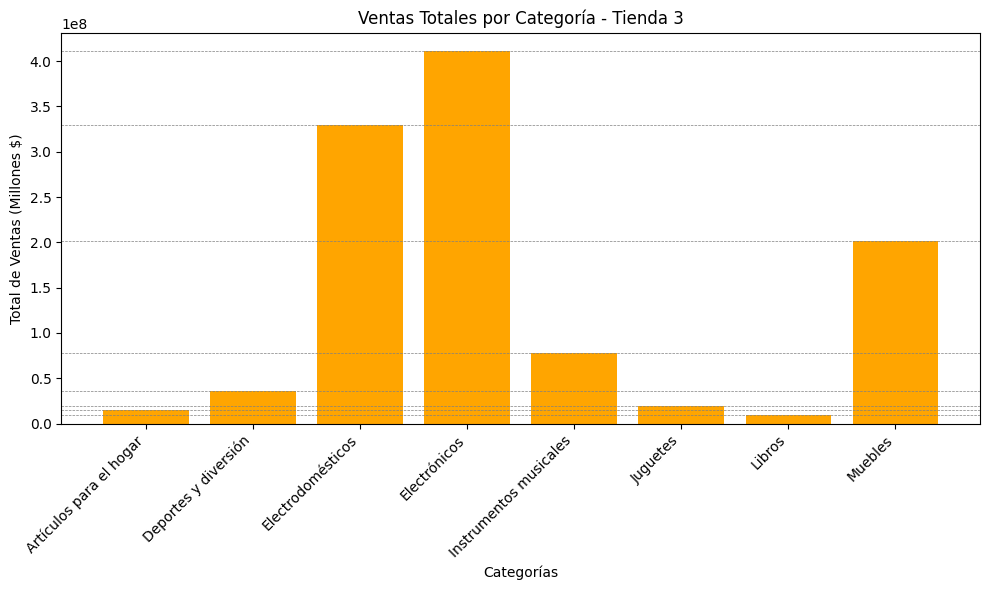

In [7]:
# Tienda 3

# Agrupación por categoría y suma de precios
categoria_valor3 = (
    tienda3
    .groupby('Categoría del Producto')['Precio']
    .sum()
    .astype(int)
    .to_dict()
)

print(f'Tienda 3, La suma de los precios agrupados por categoria es: {categoria_valor3}')

# Gráfico TIENDA 3

# Preparación de datos
categorias = list(categoria_valor3.keys())
valores = list(categoria_valor3.values())

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(categorias, valores, color='orange')

for valor in valores:
    plt.axhline(y=valor, color='gray', linestyle='--', linewidth=0.5)

# Personalizar el gráfico
plt.title("Ventas Totales por Categoría - Tienda 3")
plt.xlabel("Categorías")
plt.ylabel("Total de Ventas (Millones $)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()



Tienda 4, La suma de los precios agrupados por categoria es: {'Artículos para el hogar': 15074500, 'Deportes y diversión': 33350100, 'Electrodomésticos': 283260200, 'Electrónicos': 409476100, 'Instrumentos musicales': 75102400, 'Juguetes': 20262200, 'Libros': 9321300, 'Muebles': 192528900}


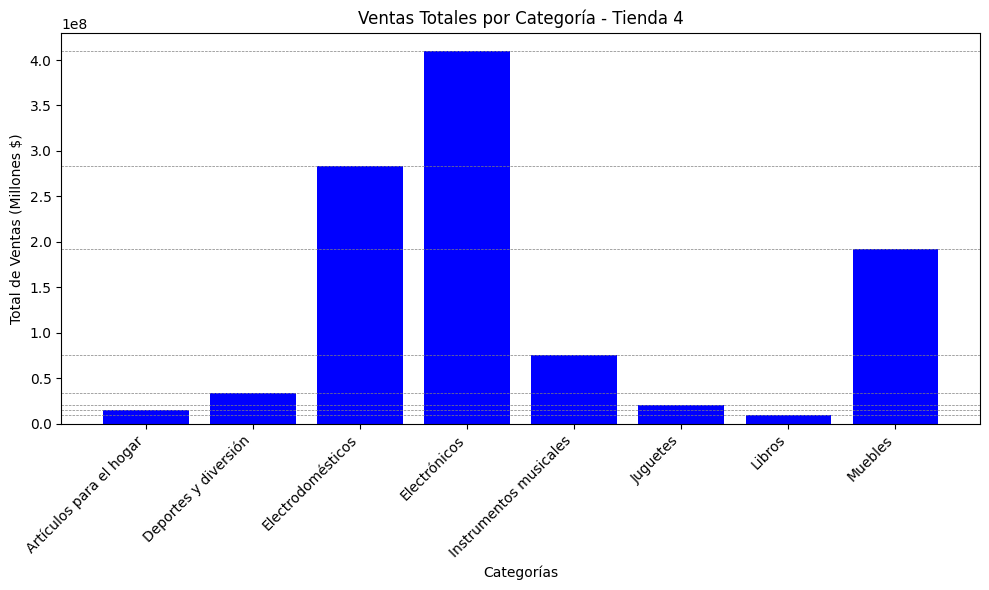

In [8]:
# Tienda 4

# Agrupación por categoría y suma de precios
categoria_valor4 = (
    tienda4
    .groupby('Categoría del Producto')['Precio']
    .sum()
    .astype(int)
    .to_dict()
)

print(f'Tienda 4, La suma de los precios agrupados por categoria es: {categoria_valor4}')

# Gráfico TIENDA 4

# Preparación de datos
categorias = list(categoria_valor4.keys())
valores = list(categoria_valor4.values())

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(categorias, valores, color='blue')

for valor in valores:
    plt.axhline(y=valor, color='gray', linestyle='--', linewidth=0.5)

# Personalizar el gráfico
plt.title("Ventas Totales por Categoría - Tienda 4")
plt.xlabel("Categorías")
plt.ylabel("Total de Ventas (Millones $)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()


### c) Calificación promedio de la tienda


In [9]:
# TIENDA 1
# Creación de una lista con las calificaciones de los clientes

calificacion_tienda1 = tienda1['Calificación'].mean(numeric_only=True)
print(f'El promedio de la calificacion Tienda 1 es: {round(calificacion_tienda1, 2)}')

# TIENDA 2
calificacion_tienda2 = tienda2['Calificación'].mean(numeric_only=True)
print(f'El promedio de la calificacion Tienda 1 es: {round(calificacion_tienda2, 2)}')

# TIENDA 3
calificacion_tienda3 = tienda3['Calificación'].mean(numeric_only=True)
print(f'El promedio de la calificacion Tienda 1 es: {round(calificacion_tienda3, 2)}')

# TIENDA 4
calificacion_tienda4 = tienda4['Calificación'].mean(numeric_only=True)
print(f'El promedio de la calificacion Tienda 1 es: {round(calificacion_tienda4, 2)}')


El promedio de la calificacion Tienda 1 es: 3.98
El promedio de la calificacion Tienda 1 es: 4.04
El promedio de la calificacion Tienda 1 es: 4.05
El promedio de la calificacion Tienda 1 es: 4.0


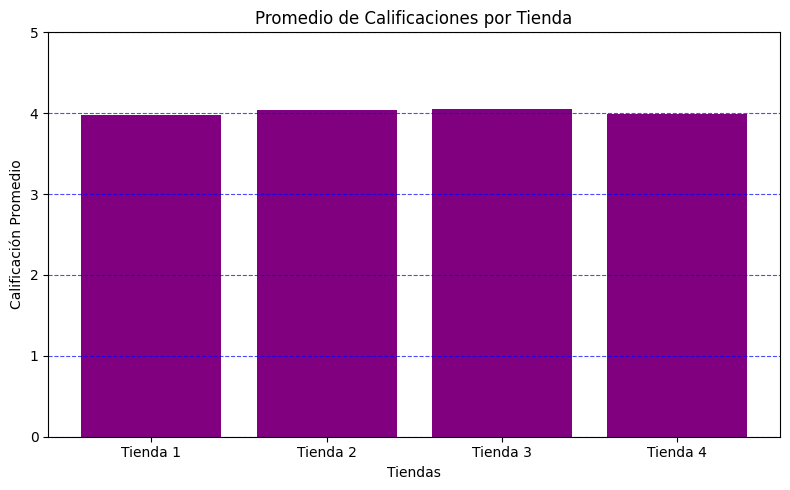

In [10]:
# Grafico de calificaciones

# Datos de entrada
promedios = [calificacion_tienda1,calificacion_tienda2,calificacion_tienda3,calificacion_tienda4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(8, 5))
plt.bar(tiendas, promedios, color='purple')

plt.title("Promedio de Calificaciones por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificación Promedio")
plt.ylim(0, 5)  # Calificaciones entre 0 y 5
plt.grid(axis='y', color='blue', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### d) Productos más y menos vendidos

In [11]:
# Creación "producto:unidades_vendidas" por cada tienda


productos_vendidos_tienda1 = tienda1['Producto'].value_counts().to_dict()
print(f'productos vendidos en la tienda 1: {productos_vendidos_tienda1}')

productos_vendidos_tienda2 = tienda2['Producto'].value_counts().to_dict()
print(f'productos vendidos en la tienda 2: {productos_vendidos_tienda2}')

productos_vendidos_tienda3 = tienda3['Producto'].value_counts().to_dict()
print(f'productos vendidos en la tienda 3: {productos_vendidos_tienda3}')

productos_vendidos_tienda4 = tienda4['Producto'].value_counts().to_dict()
print(f'productos vendidos en la tienda 4: {productos_vendidos_tienda4}')



productos vendidos en la tienda 1: {'Microondas': 60, 'TV LED UHD 4K': 60, 'Armario': 60, 'Secadora de ropa': 58, 'Mesa de noche': 56, 'Bloques de construcción': 56, 'Balón de baloncesto': 55, 'Bicicleta': 54, 'Vaso térmico': 54, 'Refrigerador': 54, 'Impresora': 54, 'Batería': 53, 'Cubertería': 52, 'Carrito de control remoto': 52, 'Modelado predictivo': 51, 'Auriculares': 50, 'Ajedrez de madera': 49, 'Iphone 15': 49, 'Lavavajillas': 48, 'Lavadora de ropa': 47, 'Guitarra eléctrica': 47, 'Guitarra acústica': 46, 'Sofá reclinable': 46, 'Silla de oficina': 46, 'Estufa': 45, 'Cama box': 44, 'Kit de bancas': 44, 'Smart TV': 44, 'Cama king': 44, 'Cubo mágico 8x8': 44, 'Mesa de centro': 44, 'Set de ollas': 43, 'Smartwatch': 43, 'Juego de mesa': 43, 'Balón de voleibol': 42, 'Dashboards con Power BI': 42, 'Tablet ABXY': 42, 'Sillón': 41, 'Iniciando en programación': 41, 'Set de vasos': 41, 'Asistente virtual': 40, 'Muñeca bebé': 40, 'Mesa de comedor': 40, 'Dinosaurio Rex': 40, 'Cuerda para salta

In [12]:
tiendas = {
    'Tienda 1': productos_vendidos_tienda1,
    'Tienda 2': productos_vendidos_tienda2,
    'Tienda 3': productos_vendidos_tienda3,
    'Tienda 4': productos_vendidos_tienda4
}

resumen = {}

for tienda, productos in tiendas.items():
    mas_vendido = max(productos, key=productos.get)
    menos_vendido = min(productos, key=productos.get)

    resumen[tienda] = {
        'Más vendido': (mas_vendido, productos[mas_vendido]),
        'Menos vendido': (menos_vendido, productos[menos_vendido])
    }

print(resumen)

# Mostrar resultados
for tienda, datos in resumen.items():
    print(f'\n{tienda}')
    print(f"Producto más vendido: {datos['Más vendido'][0]} ({datos['Más vendido'][1]} unidades)")
    print(f"Producto menos vendido: {datos['Menos vendido'][0]} ({datos['Menos vendido'][1]} unidades)")

resumen.keys


{'Tienda 1': {'Más vendido': ('Microondas', 60), 'Menos vendido': ('Auriculares con micrófono', 33)}, 'Tienda 2': {'Más vendido': ('Iniciando en programación', 65), 'Menos vendido': ('Juego de mesa', 32)}, 'Tienda 3': {'Más vendido': ('Kit de bancas', 57), 'Menos vendido': ('Bloques de construcción', 35)}, 'Tienda 4': {'Más vendido': ('Cama box', 62), 'Menos vendido': ('Guitarra eléctrica', 33)}}

Tienda 1
Producto más vendido: Microondas (60 unidades)
Producto menos vendido: Auriculares con micrófono (33 unidades)

Tienda 2
Producto más vendido: Iniciando en programación (65 unidades)
Producto menos vendido: Juego de mesa (32 unidades)

Tienda 3
Producto más vendido: Kit de bancas (57 unidades)
Producto menos vendido: Bloques de construcción (35 unidades)

Tienda 4
Producto más vendido: Cama box (62 unidades)
Producto menos vendido: Guitarra eléctrica (33 unidades)


<function dict.keys>

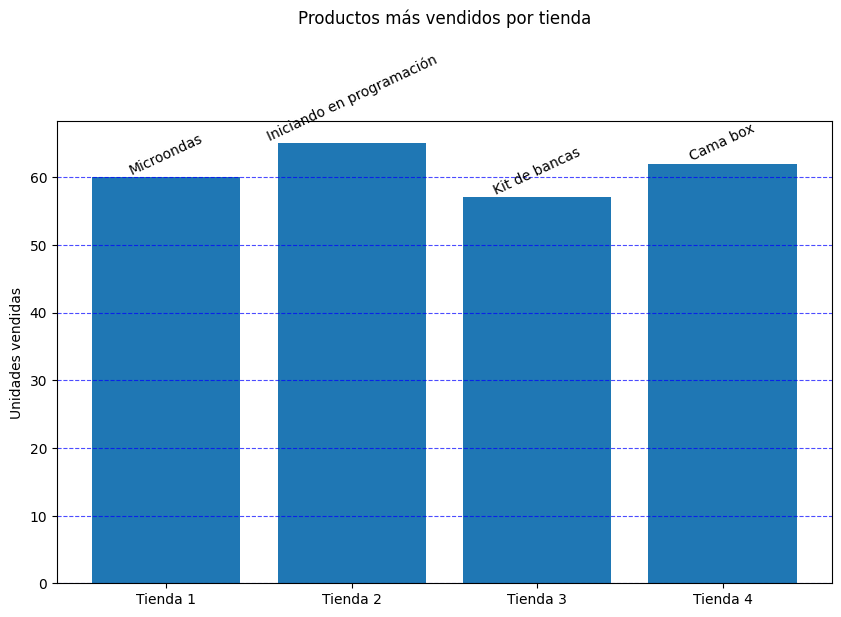

In [13]:
#Graficar resultados

import matplotlib.pyplot as plt

tiendas_nombres = list(resumen.keys())
valores_mas = [resumen[t]['Más vendido'][1] for t in tiendas_nombres]
productos_mas = [resumen[t]['Más vendido'][0] for t in tiendas_nombres]

plt.figure(figsize=(10, 6))
plt.bar(tiendas_nombres, valores_mas)
plt.title('Productos más vendidos por tienda', pad=70)
plt.ylabel('Unidades vendidas')
plt.grid(axis='y', color='blue', linestyle='--', alpha=0.7)

for i, txt in enumerate(productos_mas):
    plt.text(i, valores_mas[i], txt, ha='center', va='bottom', rotation=25)

plt.show()


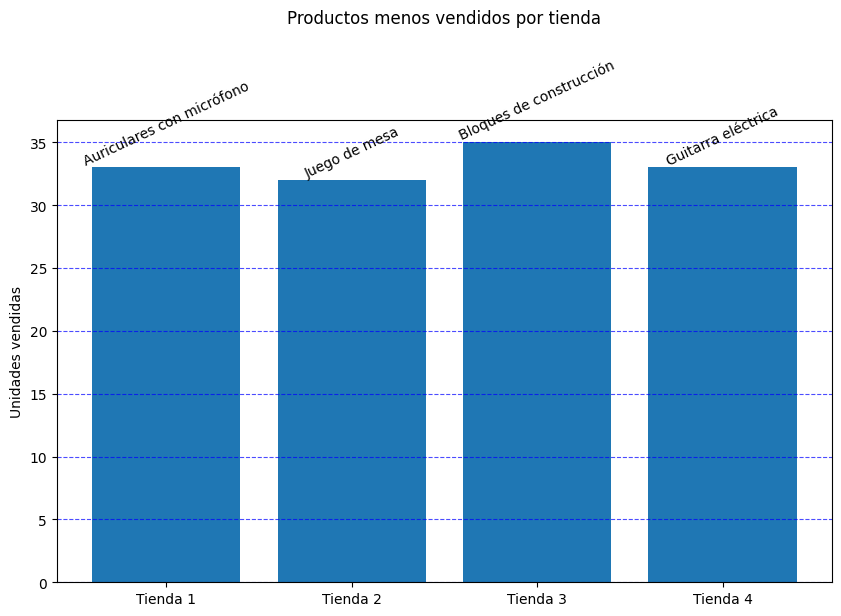

In [14]:
valores_menos = [resumen[t]['Menos vendido'][1] for t in tiendas_nombres]
productos_menos = [resumen[t]['Menos vendido'][0] for t in tiendas_nombres]

plt.figure(figsize=(10, 6))
plt.bar(tiendas_nombres, valores_menos)
plt.title('Productos menos vendidos por tienda', pad=70)
plt.ylabel('Unidades vendidas')
plt.grid(axis='y', color='blue', linestyle='--', alpha=0.7)

for i, txt in enumerate(productos_menos):
    plt.text(i, valores_menos[i], txt, ha='center', va='bottom', rotation=25)

plt.show()


### d) Envío promedio por tienda

In [25]:
# Diccionario de tiendas
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# 1️⃣ Promedio de envío por tienda
promedio_envios = {
    nombre: round(df['Costo de envío'].mean())
    for nombre, df in tiendas.items()
}

for tienda, promedio in promedio_envios.items():
    print(f'El promedio de envío de {tienda} es: {promedio}')

# 2️⃣ Suma de promedios
suma_promedios = sum(promedio_envios.values())
print(f'Suma de promedios es: {suma_promedios}')

# 3️⃣ Porcentaje de envío por tienda
porcentaje_envios = {
    tienda: round((promedio * 100) / suma_promedios, 1)
    for tienda, promedio in promedio_envios.items()
}

for tienda, porcentaje in porcentaje_envios.items():
    print(f'Porcentaje de envío de {tienda} es: {porcentaje}%')


El promedio de envío de Tienda 1 es: 26019
El promedio de envío de Tienda 2 es: 25216
El promedio de envío de Tienda 3 es: 24806
El promedio de envío de Tienda 4 es: 23459
Suma de promedios es: 99500
Porcentaje de envío de Tienda 1 es: 26.1%
Porcentaje de envío de Tienda 2 es: 25.3%
Porcentaje de envío de Tienda 3 es: 24.9%
Porcentaje de envío de Tienda 4 es: 23.6%


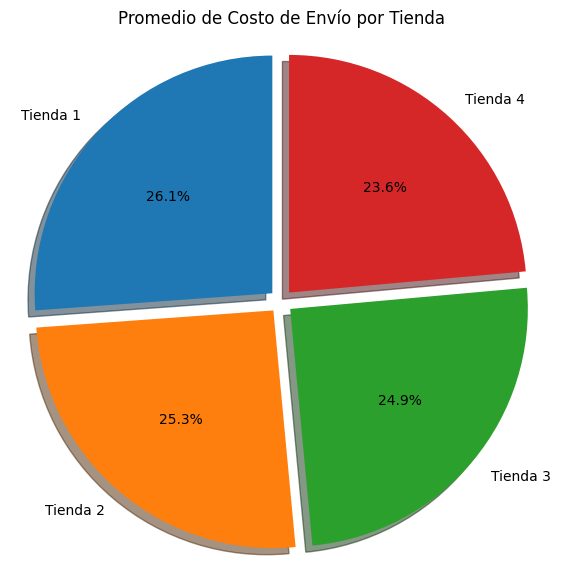

In [29]:
import matplotlib.pyplot as plt

# Datos (promedios por tienda)
promedio_envios = {
    'Tienda 1': promedio_envio_tienda1,
    'Tienda 2': promedio_envio_tienda2,
    'Tienda 3': promedio_envio_tienda3,
    'Tienda 4': promedio_envio_tienda4
}

labels = list(promedio_envios.keys())
valores = list(promedio_envios.values())

# Separación ligera para efecto 3D
explode = [0.05] * len(labels)

# Crear figura
plt.figure(figsize=(7, 7))
fig.patch.set_facecolor('blue')  # Fondo azul

plt.pie(
    valores,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True
)

plt.title('Promedio de Costo de Envío por Tienda')
plt.axis('equal')  # Mantiene forma circular

plt.show()


#**Informe Final**

Este analisis se realizó con el fin de entregar una recomendcion sobre cual tienda se debería vender, con base a el analisis de datos que se acaba de realizar.

Tienda 4 (la menos conveniente)

Razones:

* Presenta ventas totales más bajas que las tiendas 1, 2 y 3
* Menor rendimiento en categorías clave como:

  -Electrónicos

  -Electrodomésticos

* No compensa sus costos logísticos con volumen de ventas

* Menor impacto en productos más vendidos

➡️ Conclusión:
📉 Aporta menos al negocio global


🟡 Tienda 1 y Tienda 2:

* Ventas intermedias

* Buen equilibrio entre categorías

* Costos de envío razonables

* No son líderes, pero tampoco críticas

➡️ No son prioridad para vender

🟢 Tienda 3 (la más fuerte)

* Mayores ventas totales

* Lidera en categorías de alto valor

* Buen desempeño en productos más vendidos

* Mejor relación ventas / costos

➡️ Debe mantenerse


✅ DECISIÓN FINAL
🏷️ La tienda que debería venderse es: 👉 TIENDA 4

Porque:

* Es la que menos aporta en ingresos

* No compensa costos con volumen

* Tiene menor peso estratégico

